In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Report notebook

In [19]:
import pandas as pd

df = pd.read_csv('datasets/tmdb-15000-movies.csv', lineterminator='\n')

In [20]:
from tmdb15k.notebooks import Genres, Keywords, Popularity, VoteAverage, VoteCount

df = df[df['original_language'] == 'en']
df = df[df['popularity'] <= 100]
df = df[df['vote_count'] >= 100]

popularity = Popularity(df)
vote_average = VoteAverage(df)
vote_count = VoteCount(df)
genres = Genres(df)
keywords = Keywords(df)

/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/notebooks.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.fillna(0, inplace=True)
/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/notebooks.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dst] = (df[src] - df[src].min()) / (df[src].max() - df[src].min())
/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/notebooks.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [21]:
from tmdb15k.notebooks import ComputedLinearRegression

genres_lr = ComputedLinearRegression(genres.df, vote_average.df_min_max)

print('Linear Regression: genres -> vote_average')
print(genres_lr.mse)
print(genres_lr.rmse)

keywords_lr = ComputedLinearRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('Linear Regression: keywords -> vote_average')
print(keywords_lr.mse)
print(keywords_lr.rmse)

genres_keywords_lr = ComputedLinearRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('Linear Regression: genres + keywords -> vote_average')
print(genres_keywords_lr.mse)
print(genres_keywords_lr.rmse)

Linear Regression: genres -> vote_average
0.03362423874310333
0.18336913247082598
Linear Regression: keywords -> vote_average
0.0370361481756339
0.19244778038635285
Linear Regression: genres + keywords -> vote_average
0.03256830073256487
0.18046689650061828


In [22]:
from tmdb15k.notebooks import ComputedDecisionTreeRegression 

genres_dtr = ComputedDecisionTreeRegression(genres.df, vote_average.df_min_max)

print('Decision Tree Regression: genres -> vote_average')
print(f"MSE: {genres_dtr.mse}")
print(f"RMSE: {genres_dtr.rmse}")

keywords_dtr = ComputedDecisionTreeRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('Decision Tree Regression: keywords -> vote_average')
print(f"MSE: {keywords_dtr.mse}")
print(f"RMSE: {keywords_dtr.rmse}")

genres_keywords_dtr = ComputedDecisionTreeRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('Decision Tree Regression: genres + keywords -> vote_average')
print(f"MSE: {genres_keywords_dtr.mse}")
print(f"RMSE: {genres_keywords_dtr.rmse}")

Decision Tree Regression: genres -> vote_average
MSE: 0.0376046672076422
RMSE: 0.1939192285660249
Decision Tree Regression: keywords -> vote_average
MSE: 0.03899601782032208
RMSE: 0.19747409404861713
Decision Tree Regression: genres + keywords -> vote_average
MSE: 0.045334292217876236
RMSE: 0.21291851074501775


In [23]:
from tmdb15k.notebooks import ComputedRandomForestRegression 

genres_rfr = ComputedRandomForestRegression(genres.df, vote_average.df_min_max)

print('Random Forest Regression: genres -> vote_average')
print(f"MSE: {genres_rfr.mse}")
print(f"RMSE: {genres_rfr.rmse}")

keywords_rfr = ComputedRandomForestRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('Random Forest Regression: keywords -> vote_average')
print(f"MSE: {keywords_rfr.mse}")
print(f"RMSE: {keywords_rfr.rmse}")

genres_keywords_rfr = ComputedRandomForestRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('Random Forest Regression: genres + keywords -> vote_average')
print(f"MSE: {genres_keywords_rfr.mse}")
print(f"RMSE: {genres_keywords_rfr.rmse}")

Random Forest Regression: genres -> vote_average
MSE: 0.035544920704323635
RMSE: 0.1885336062995763
Random Forest Regression: keywords -> vote_average
MSE: 0.037971878008188395
RMSE: 0.19486374215894653
Random Forest Regression: genres + keywords -> vote_average
MSE: 0.036055879547913366
RMSE: 0.18988385804989683


In [24]:
from tmdb15k.notebooks import ComputedGradientBoostingRegression

genres_gbr = ComputedGradientBoostingRegression(genres.df, vote_average.df_min_max)

print('Gradient Boosting Regression: genres -> vote_average')
print(f"MSE: {genres_gbr.mse}")
print(f"RMSE: {genres_gbr.rmse}")

keywords_gbr = ComputedGradientBoostingRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('Gradient Boosting Regression: keywords -> vote_average')
print(f"MSE: {keywords_gbr.mse}")
print(f"RMSE: {keywords_gbr.rmse}")

genres_keywords_gbr = ComputedGradientBoostingRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('Gradient Boosting Regression: genres + keywords -> vote_average')
print(f"MSE: {genres_keywords_gbr.mse}")
print(f"RMSE: {genres_keywords_gbr.rmse}")

Gradient Boosting Regression: genres -> vote_average
MSE: 0.03344668629093823
RMSE: 0.18288435223096106
Gradient Boosting Regression: keywords -> vote_average
MSE: 0.03720412795363626
RMSE: 0.19288371614430352
Gradient Boosting Regression: genres + keywords -> vote_average
MSE: 0.03237187071269431
RMSE: 0.1799218461240722


In [25]:
from tmdb15k.notebooks import ComputedXGBRegression

genres_xgbr = ComputedXGBRegression(genres.df, vote_average.df_min_max)

print('XGB Regression: genres -> vote_average')
print(f"MSE: {genres_xgbr.mse}")
print(f"RMSE: {genres_xgbr.rmse}")

keywords_xgbr = ComputedXGBRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('XGB Regression: keywords -> vote_average')
print(f"MSE: {keywords_xgbr.mse}")
print(f"RMSE: {keywords_xgbr.rmse}")

genres_keywords_xgbr = ComputedXGBRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('XGB Regression: genres + keywords -> vote_average')
print(f"MSE: {genres_keywords_xgbr.mse}")
print(f"RMSE: {genres_keywords_xgbr.rmse}")

XGB Regression: genres -> vote_average
MSE: 0.035329115326011844
RMSE: 0.1879604089323383
XGB Regression: keywords -> vote_average
MSE: 0.03889501800490608
RMSE: 0.19721819896983667
XGB Regression: genres + keywords -> vote_average
MSE: 0.034009990189599625
RMSE: 0.18441797686125835


===> Summary | Genres -> Vote Average
                          Model      RMSE
3  Gradient Boosting Regression  0.182884
0             Linear Regression  0.183369
4                XGB Regression  0.187960
2      Random Forest Regression  0.188534
1      Decision Tree Regression  0.193919


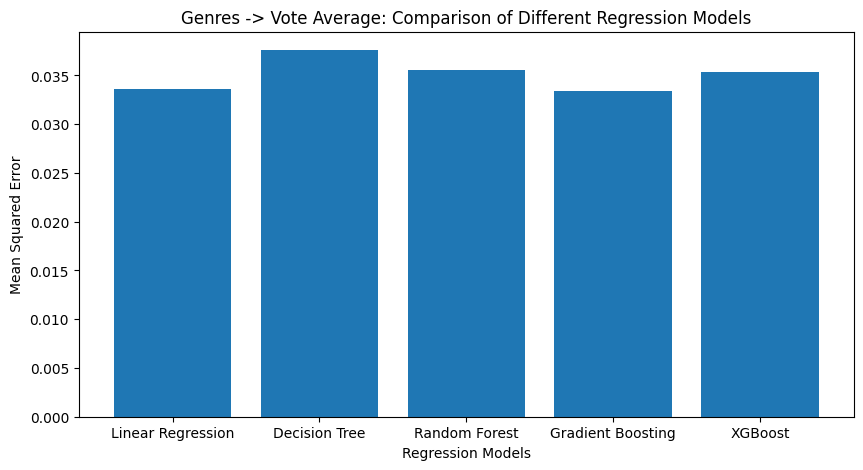

===> Summary | Keywords -> Vote Average
                          Model      RMSE
0             Linear Regression  0.192448
3  Gradient Boosting Regression  0.192884
2      Random Forest Regression  0.194864
4                XGB Regression  0.197218
1      Decision Tree Regression  0.197474


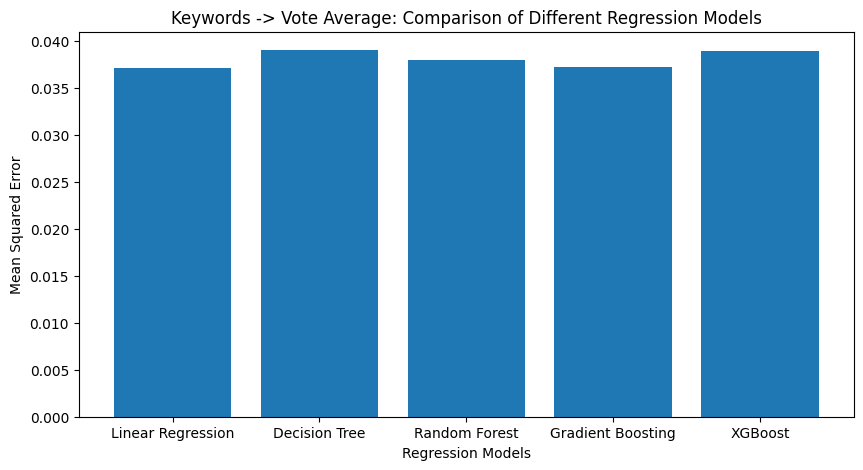

===> Summary | Genres + Keywords -> Vote Average
                          Model      RMSE
3  Gradient Boosting Regression  0.179922
0             Linear Regression  0.180467
4                XGB Regression  0.184418
2      Random Forest Regression  0.189884
1      Decision Tree Regression  0.212919


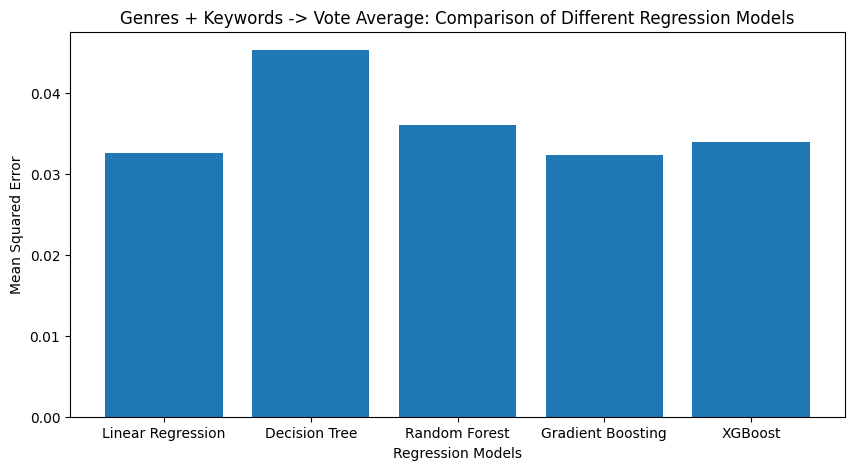

===> Summary | Genres -> Vote Count
                          Model      RMSE
3  Gradient Boosting Regression  0.207557
0             Linear Regression  0.211046
4                XGB Regression  0.211832
2      Random Forest Regression  0.213380
1      Decision Tree Regression  0.216731


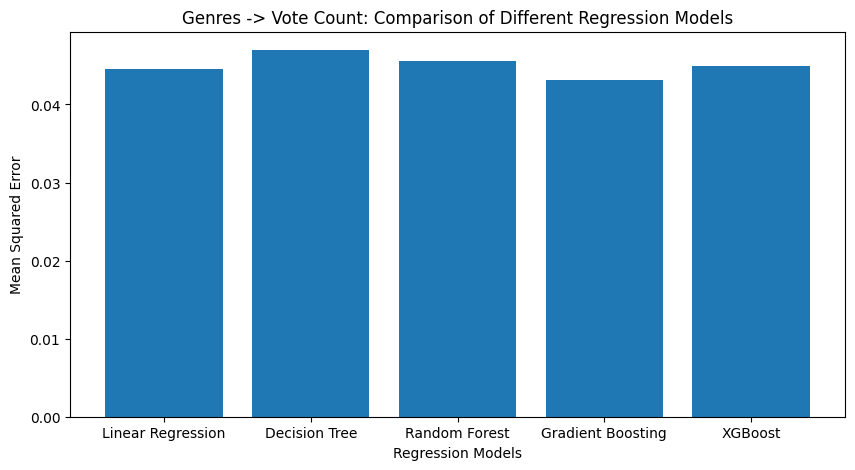

===> Summary | Keywords -> Vote Count
                          Model      RMSE
0             Linear Regression  0.207959
3  Gradient Boosting Regression  0.208807
2      Random Forest Regression  0.211087
1      Decision Tree Regression  0.213167
4                XGB Regression  0.213808


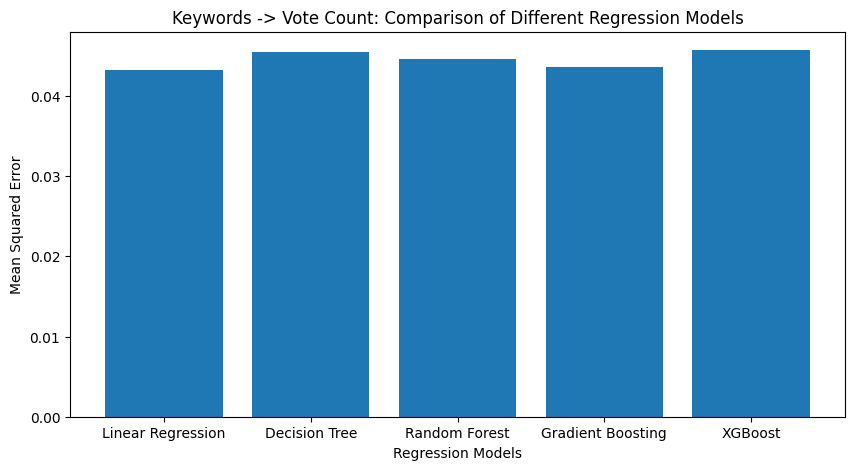

===> Summary | Genres + Keywords -> Vote Count
                          Model      RMSE
3  Gradient Boosting Regression  0.200832
0             Linear Regression  0.202623
4                XGB Regression  0.206592
2      Random Forest Regression  0.210081
1      Decision Tree Regression  0.237942


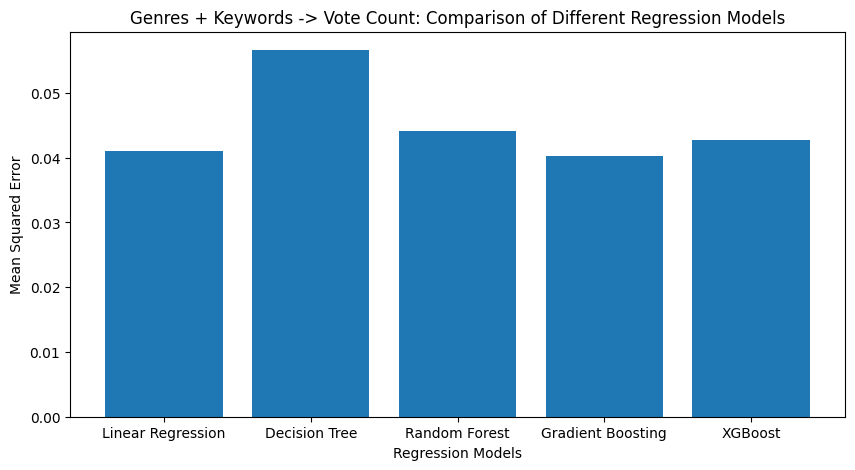

===> Summary | Genres -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  0.144484
0             Linear Regression  0.147584
4                XGB Regression  0.148627
2      Random Forest Regression  0.150290
1      Decision Tree Regression  0.153052


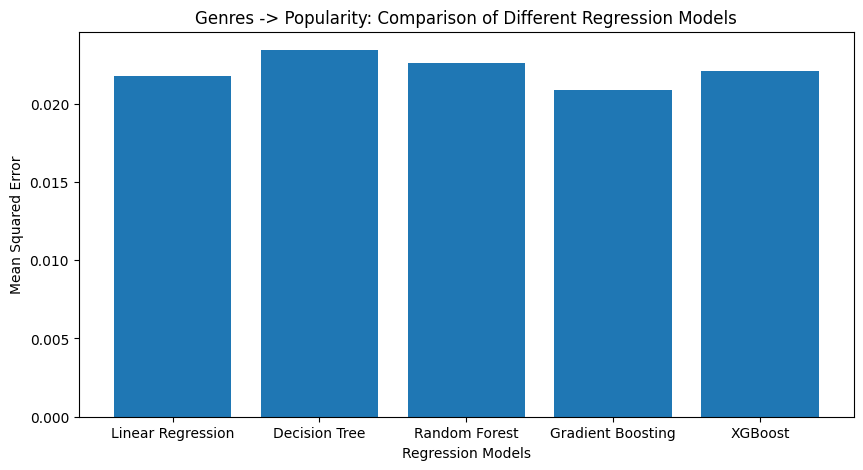

===> Summary | Keywords -> Popularity
                          Model      RMSE
0             Linear Regression  0.151280
3  Gradient Boosting Regression  0.152380
2      Random Forest Regression  0.154479
1      Decision Tree Regression  0.156440
4                XGB Regression  0.157421


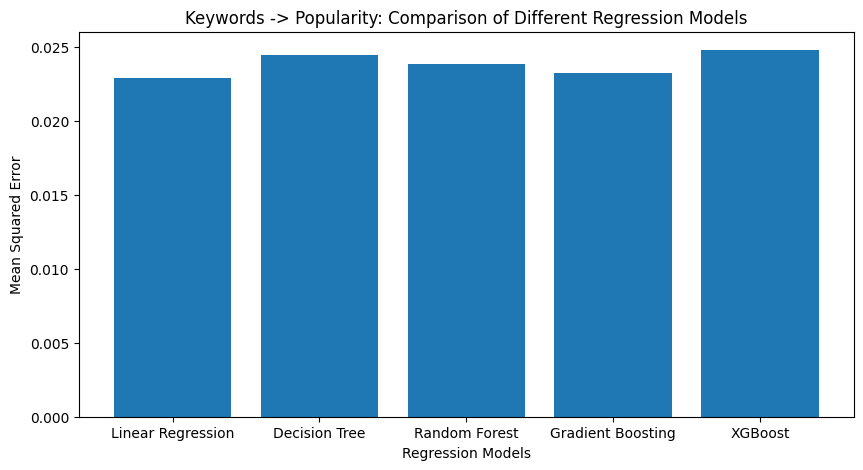

===> Summary | Genres + Keywords -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  0.143989
0             Linear Regression  0.145614
4                XGB Regression  0.145694
2      Random Forest Regression  0.148225
1      Decision Tree Regression  0.164260


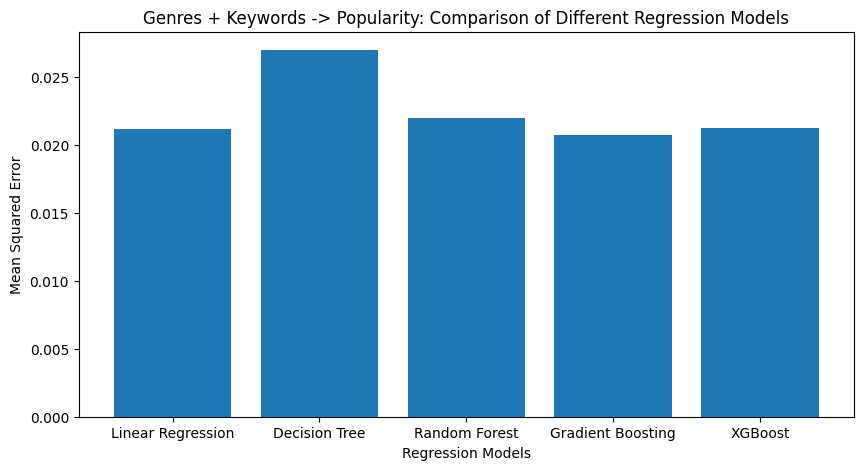

===> Summary | Genres + Keywords + Vote average + Vote count -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  0.112343
2      Random Forest Regression  0.115284
4                XGB Regression  0.117902
0             Linear Regression  0.118992
1      Decision Tree Regression  0.158118


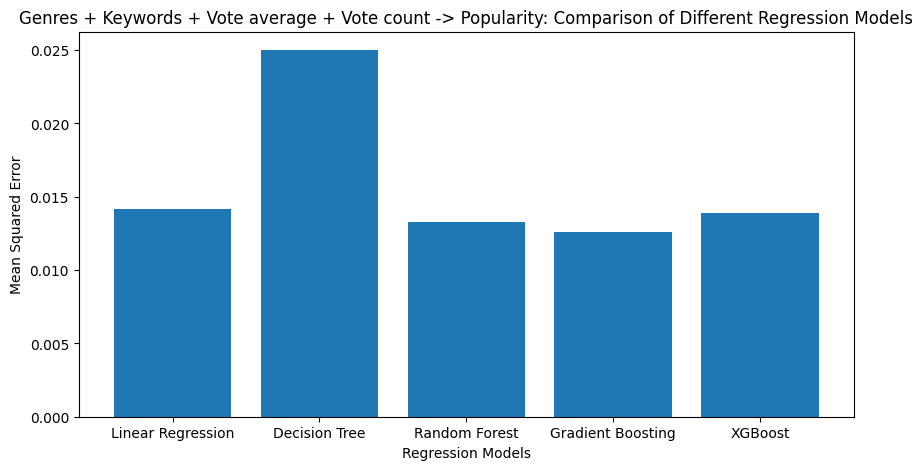

In [26]:
from tmdb15k.notebooks import Relationship 

relationships: list[Relationship] = [
    Relationship('Genres -> Vote Average', genres.df, vote_average.df_min_max),
    Relationship('Keywords -> Vote Average', keywords.df[keywords.columns_top_20], vote_average.df_min_max),
    Relationship('Genres + Keywords -> Vote Average', [genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max),
    Relationship('Genres -> Vote Count', genres.df, vote_count.df_log10_min_max),
    Relationship('Keywords -> Vote Count', keywords.df[keywords.columns_top_20], vote_count.df_log10_min_max),
    Relationship('Genres + Keywords -> Vote Count', [genres.df, keywords.df[keywords.columns_top_20]], vote_count.df_log10_min_max),
    Relationship('Genres -> Popularity', genres.df, popularity.df_min_max),
    Relationship('Keywords -> Popularity', keywords.df[keywords.columns_top_20], popularity.df_min_max),
    Relationship('Genres + Keywords -> Popularity', [genres.df, keywords.df[keywords.columns_top_20]], popularity.df_min_max),
    Relationship('Genres + Keywords + Vote average + Vote count -> Popularity', [genres.df, keywords.df[keywords.columns_top_20], vote_average.df_min_max, vote_count.df_log10_min_max], popularity.df_min_max),
]

for i in relationships:
    i.print_summary()
    i.print_plot()